<a href="https://colab.research.google.com/github/bdgToji/VNP_Sales_Forecasting_Proekt/blob/main/VNP_proekt_211202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цел на проектот:
***Collect sales data from 3 different sources and make a sales forecasting model.***

Користени datasets за проектот:


*   [Car sales](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data)
*   [Supermarket sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)
*   [Adidas sales](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Input, Dense, LSTM, Embedding, concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Dropout, Input, MaxPooling1D, Flatten, MaxPooling1D
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from xgboost import cv, DMatrix, plot_importance, XGBRegressor

# Car Sales dataset

In [ ]:
df_cars = pd.read_csv('/content/drive/MyDrive/VNP/car_prices.csv')

In [ ]:
df_cars

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


## Претпроцесирање на податоците

In [ ]:
df_half = df_cars.sample(frac=0.85, random_state=42)

df_remaining = df_cars.drop(df_half.index)

In [ ]:
df_cars = df_remaining

In [ ]:
df_cars = df_cars.drop(columns=['trim','body','vin'])

In [ ]:
df_cars

,year,make,model,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
5,2015,Nissan,Altima,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
13,2015,Kia,Sorento,automatic,ca,5.0,14634.0,silver,black,kia motors america inc,20600.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
15,2015,Nissan,Altima,automatic,ca,2.0,11398.0,black,black,enterprise vehicle exchange / tra / rental / t...,14750.0,14100.0,Tue Dec 23 2014 12:00:00 GMT-0800 (PST)
19,2014,BMW,6 Series,automatic,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
25,2015,Hyundai,Sonata,automatic,ca,NaN,9281.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,15150.0,8500.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558794,2007,Chrysler,PT Cruiser,automatic,nc,19.0,100881.0,silver,gray,national fleet leasing,2000.0,3000.0,Mon Jul 06 2015 06:30:00 GMT-0700 (PDT)
558819,2012,Kia,Optima,automatic,fl,44.0,58176.0,red,beige,kia motors finance,12850.0,11800.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
558820,2014,Dodge,Charger,NaN,va,42.0,22744.0,white,black,hertz corporation/gdp,16250.0,15900.0,Wed Jul 08 2015 07:15:00 GMT-0700 (PDT)
558827,2014,Jeep,Grand Cherokee,automatic,pa,42.0,25180.0,gray,black,hertz corporation/gdp,26000.0,24500.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)


In [ ]:
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,83826.0,2010.041300,3.961113,1982.0,2007.0,2012.0,2013.0,2015.0
condition,82041.0,30.629649,13.428588,1.0,23.0,35.0,41.0,49.0
odometer,83815.0,68253.120265,53125.819488,1.0,28373.0,52416.0,99133.0,999999.0
mmr,83818.0,13767.232277,9657.757521,25.0,7125.0,12300.0,18300.0,176000.0
sellingprice,83823.0,13607.293261,9732.504879,100.0,6900.0,12100.0,18200.0,165000.0


In [ ]:
df_cars.isna().sum()/df_cars.count()*100

,0
year,0.000000
make,1.877712
model,1.893810
transmission,13.151465
state,0.000000
condition,2.175741
odometer,0.013124
color,0.097917
interior,0.097917
seller,0.000000


In [ ]:
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,83826.0,2010.041300,3.961113,1982.0,2007.0,2012.0,2013.0,2015.0
condition,82041.0,30.629649,13.428588,1.0,23.0,35.0,41.0,49.0
odometer,83815.0,68253.120265,53125.819488,1.0,28373.0,52416.0,99133.0,999999.0
mmr,83818.0,13767.232277,9657.757521,25.0,7125.0,12300.0,18300.0,176000.0
sellingprice,83823.0,13607.293261,9732.504879,100.0,6900.0,12100.0,18200.0,165000.0


In [ ]:
df_cars.describe(exclude='number').T

,count,unique,top,freq
make,82281,83,Ford,14001
model,82268,795,Altima,2936
transmission,74083,4,automatic,71441
state,83826,43,fl,12399
color,83744,25,black,16714
interior,83744,17,black,36696
seller,83826,6795,nissan-infiniti lt,3012
saledate,83823,2678,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),835


In [ ]:
df_cars['transmission'].fillna('automatic', inplace=True)

In [ ]:
df_cars.dropna(axis=0, inplace=True)

In [ ]:
df_cars.isna().sum()/df_cars.count()*100

,0
year,0.0
make,0.0
model,0.0
transmission,0.0
state,0.0
condition,0.0
odometer,0.0
color,0.0
interior,0.0
seller,0.0


In [ ]:
df_cars['saledate'] = df_cars['saledate'].str.replace(r' GMT.*', '', regex=True)
df_cars['saledate'] = pd.to_datetime(df_cars['saledate'], format='%a %b %d %Y %H:%M:%S', errors='coerce')

In [ ]:
df_cars['year'] = pd.to_datetime(df_cars['year'], format='%Y').dt.year

In [ ]:
df_cars['condition'].unique()

array([ 1.,  5.,  2., 34., 48., 47.,  4., 44., 41., 49., 45., 38., 42.,
       37., 43., 46., 36., 26., 28.,  3., 35., 39., 33., 25., 31., 32.,
       22., 24., 19., 27., 23., 21., 29., 18., 11., 14., 17., 12., 15.,
       16., 13.])

In [ ]:
df_cars['condition'].replace(range(10,21), 1, inplace=True)
df_cars['condition'].replace(range(20,31), 2, inplace=True)
df_cars['condition'].replace(range(30,41), 3, inplace=True)
df_cars['condition'].replace(range(40,51), 4, inplace=True)

In [ ]:
df_cars['color'].unique()

array(['gray', 'silver', 'black', 'beige', 'red', 'white', 'burgundy',
       'blue', 'green', '—', 'brown', 'gold', 'orange', 'off-white',
       'charcoal', 'yellow', 'purple', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
df_cars['interior'].unique()

array(['black', 'beige', '—', 'gray', 'brown', 'burgundy', 'tan', 'blue',
       'off-white', 'green', 'purple', 'silver', 'red', 'orange', 'white',
       'gold', 'yellow'], dtype=object)

In [ ]:
df_cars['color'].replace('—', 'multicolor', inplace=True)
df_cars['interior'].replace('—', 'multicolor', inplace=True)

In [ ]:
df_cars

,year,make,model,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
5,2015,Nissan,Altima,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2014-12-30 12:00:00
13,2015,Kia,Sorento,automatic,ca,5.0,14634.0,silver,black,kia motors america inc,20600.0,21500.0,2014-12-16 12:30:00
15,2015,Nissan,Altima,automatic,ca,2.0,11398.0,black,black,enterprise vehicle exchange / tra / rental / t...,14750.0,14100.0,2014-12-23 12:00:00
19,2014,BMW,6 Series,automatic,ca,3.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,2014-12-17 12:30:00
27,2015,Volvo,XC70,automatic,ca,4.0,12725.0,beige,beige,volvo na rep/world omni,32300.0,32500.0,2015-02-12 04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558794,2007,Chrysler,PT Cruiser,automatic,nc,1.0,100881.0,silver,gray,national fleet leasing,2000.0,3000.0,2015-07-06 06:30:00
558819,2012,Kia,Optima,automatic,fl,4.0,58176.0,red,beige,kia motors finance,12850.0,11800.0,2015-07-07 06:30:00
558820,2014,Dodge,Charger,automatic,va,4.0,22744.0,white,black,hertz corporation/gdp,16250.0,15900.0,2015-07-08 07:15:00
558827,2014,Jeep,Grand Cherokee,automatic,pa,4.0,25180.0,gray,black,hertz corporation/gdp,26000.0,24500.0,2015-07-07 06:30:00


## Визуелизација на податоците

In [ ]:
def countplot(col, label, rotation=0, size=(12,6)):
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    sns.countplot(x=df_cars[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)

<ipython-input-24-722a00c8cfeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cars[col], palette='viridis')


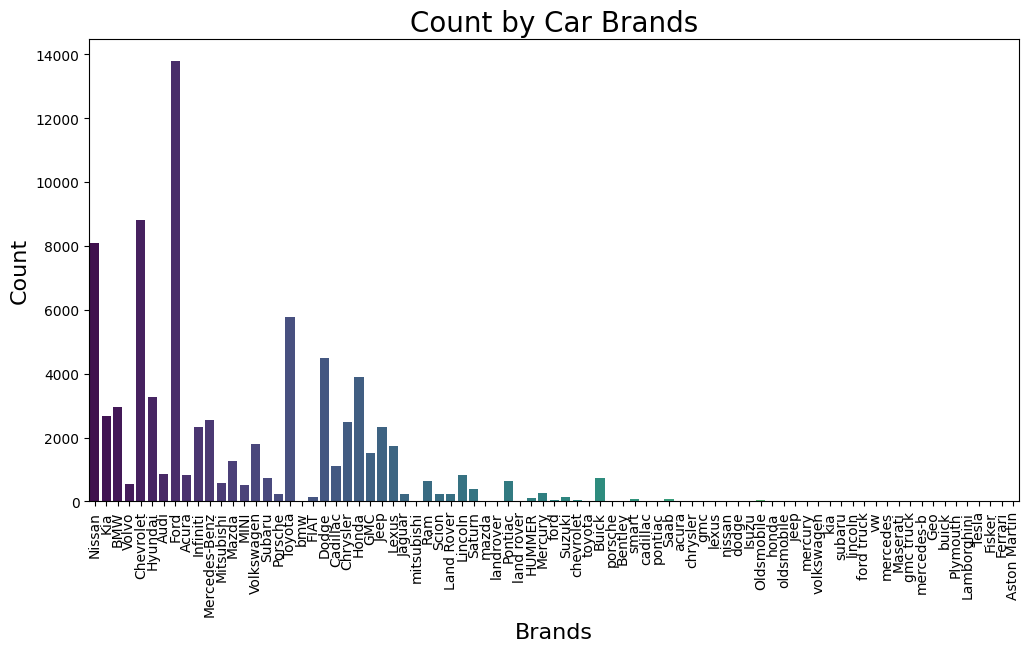

In [ ]:
countplot('make', 'Brands', 90)

<ipython-input-24-722a00c8cfeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cars[col], palette='viridis')


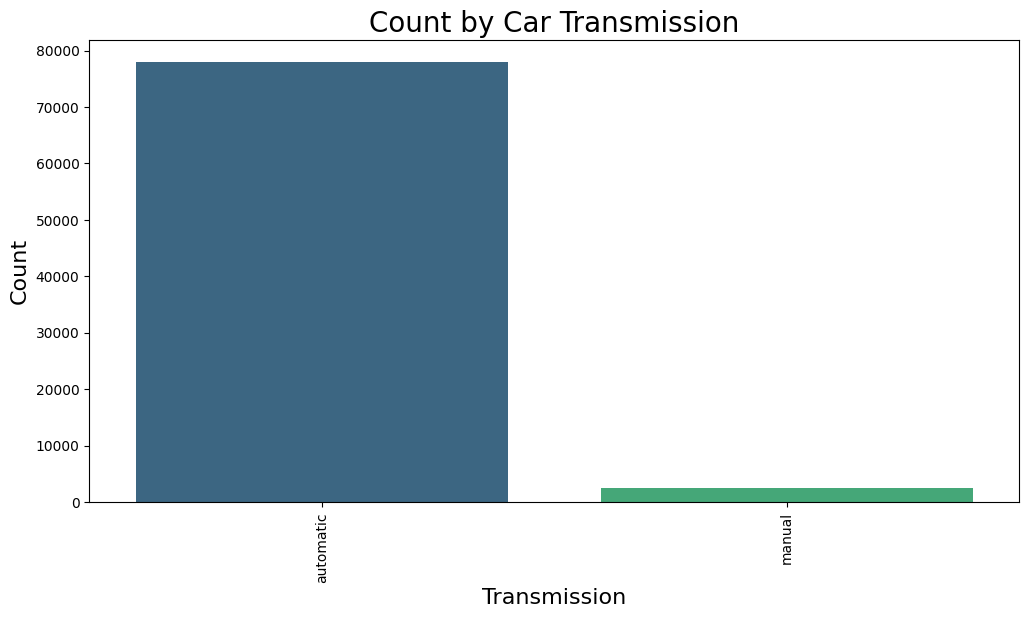

In [ ]:
countplot('transmission', 'Transmission', 90)

<ipython-input-24-722a00c8cfeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cars[col], palette='viridis')


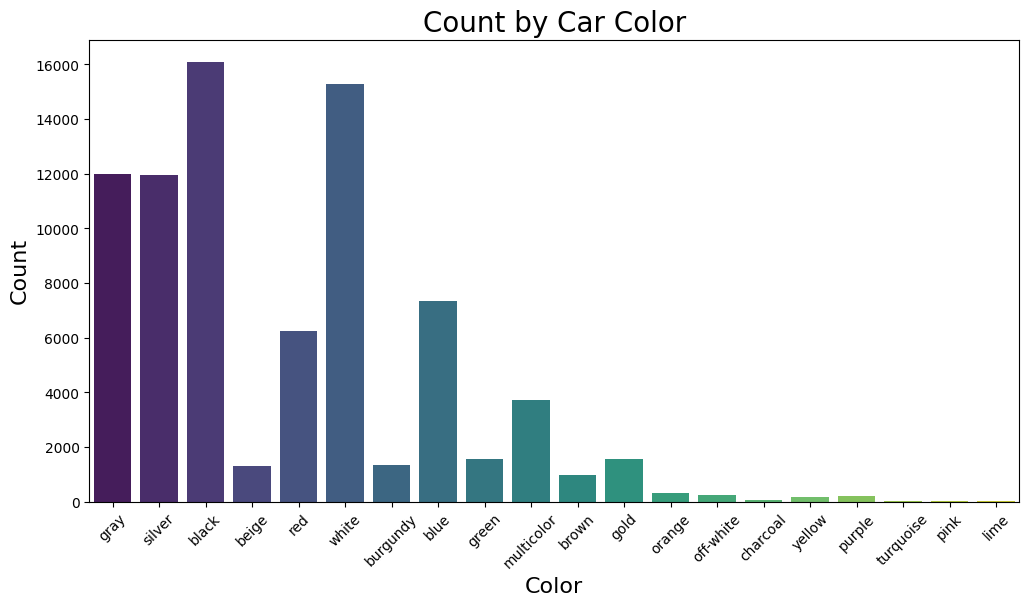

In [ ]:
countplot('color', 'Color', 45)

<ipython-input-24-722a00c8cfeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cars[col], palette='viridis')


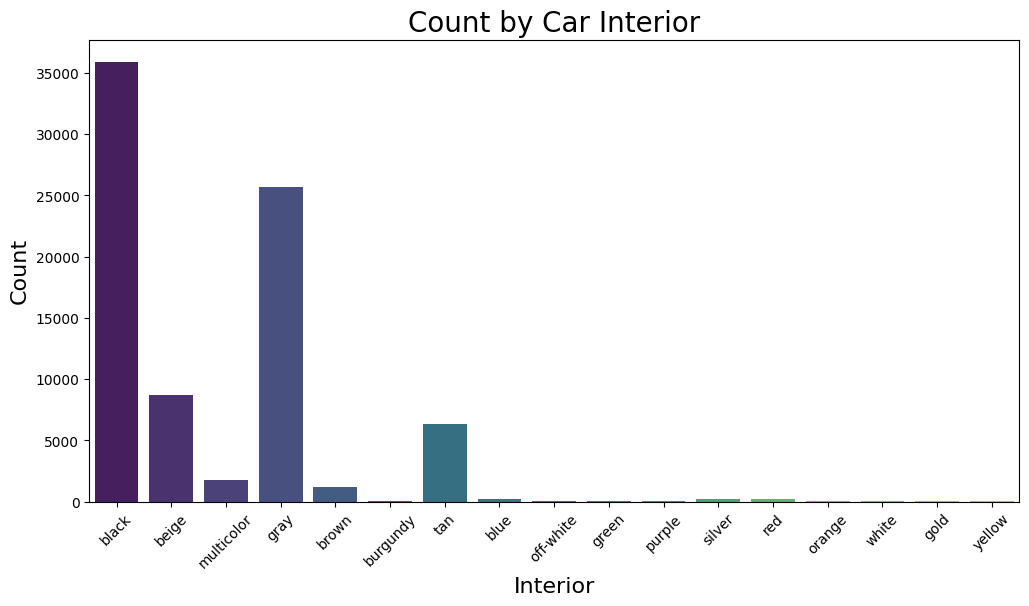

In [ ]:
countplot('interior', 'Interior', 45)

<ipython-input-24-722a00c8cfeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cars[col], palette='viridis')


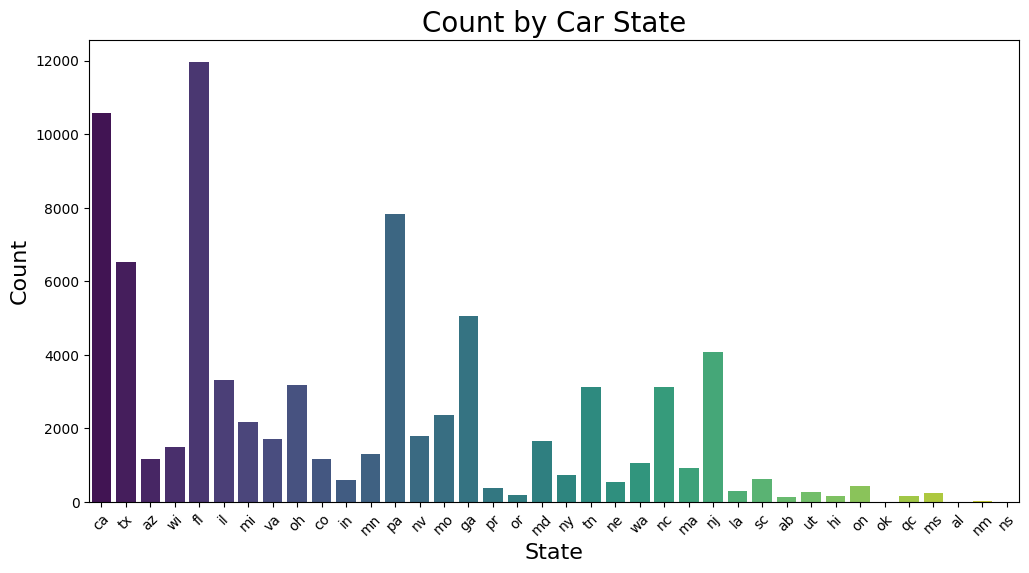

In [ ]:
countplot('state', 'State', 45)

In [ ]:
def boxplot(col, label):

    plt.figure(figsize=(10,6))
    sns.boxplot(df_cars[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.ylabel(label, fontsize=16)


def histplot(col, label):

    plt.figure(figsize=(10,6))
    sns.histplot(df_cars[col], palette='viridis')
    plt.title(label, fontsize=20)
    plt.xlabel(label, fontsize=16)

<ipython-input-30-4e54ec67556c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_cars[col], palette='viridis')


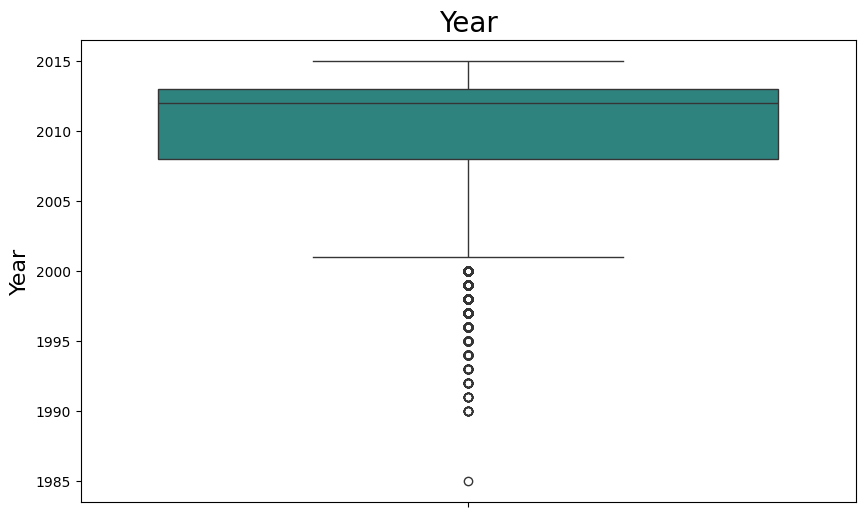

In [ ]:
boxplot('year', 'Year')

<ipython-input-30-4e54ec67556c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_cars[col], palette='viridis')


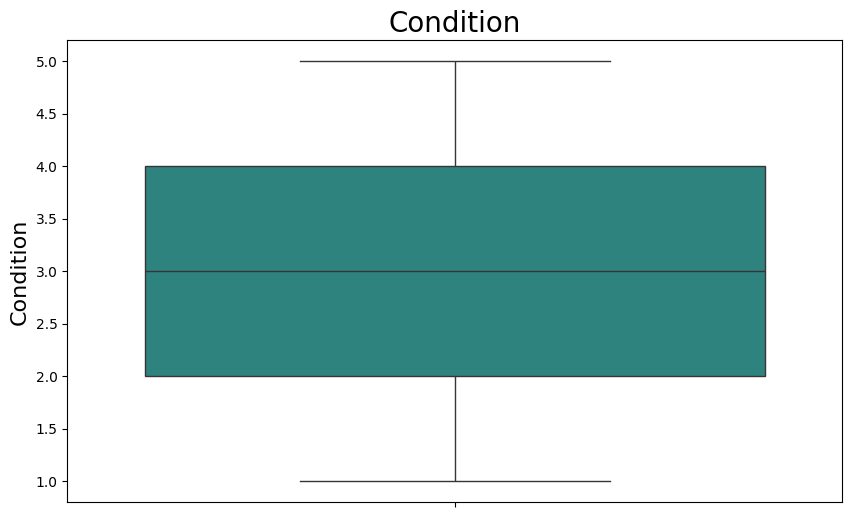

In [ ]:
boxplot('condition', 'Condition')

<ipython-input-30-4e54ec67556c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_cars[col], palette='viridis')


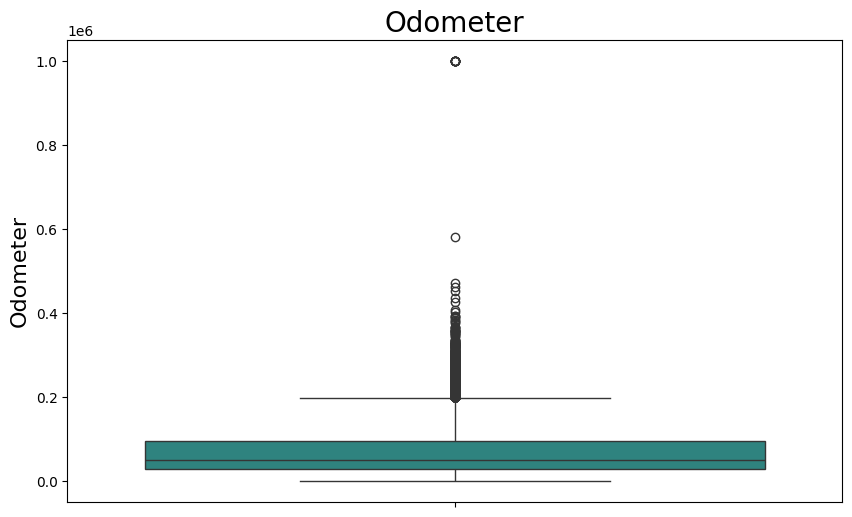

In [ ]:
boxplot('odometer', 'Odometer')

<ipython-input-30-4e54ec67556c>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cars[col], palette='viridis')


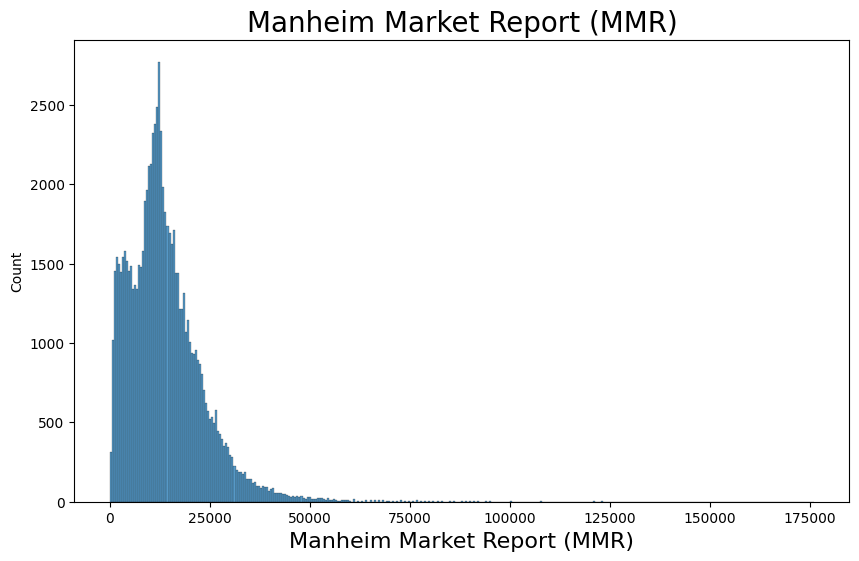

In [ ]:
histplot('mmr', 'Manheim Market Report (MMR)')

<ipython-input-30-4e54ec67556c>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cars[col], palette='viridis')


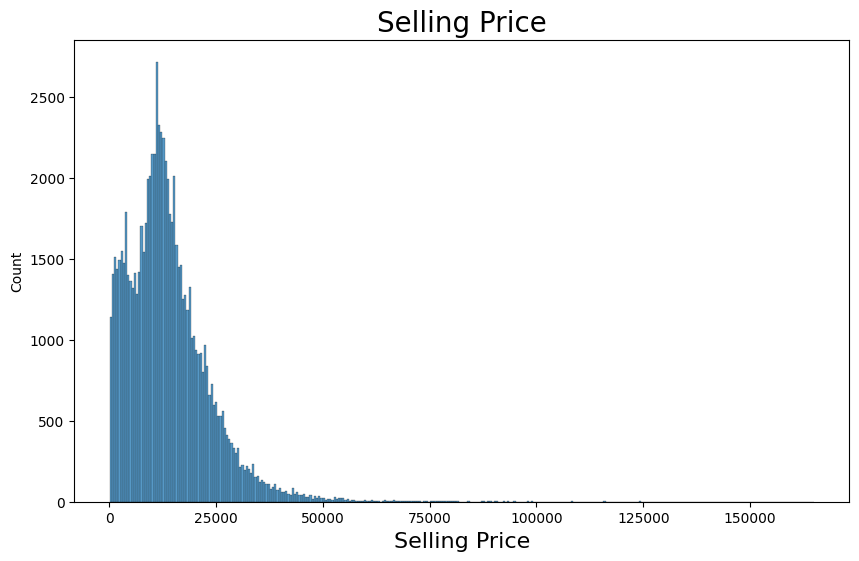

In [ ]:
histplot('sellingprice', 'Selling Price')

In [ ]:
df_cars = pd.get_dummies(df_cars, columns=['make','model','transmission','state','color','interior','seller'])

In [ ]:
df_cars

,year,condition,odometer,mmr,sellingprice,saledate,make_Acura,make_Aston Martin,make_Audi,make_BMW,...,seller_z & s auto league inc,seller_z line auto wholesalers corp,seller_zappone chrysler jeep dodge ram,seller_zeigler honda amherst,seller_ziems ford corners inc,seller_zimbrick eastside,seller_zimbrick volkswagen of madison,seller_zimmerman auto brokers inc,seller_zipcar,seller_zumbrota ford sales llc
5,2015,1.0,5554.0,15350.0,10900.0,2014-12-30 12:00:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,2015,5.0,14634.0,20600.0,21500.0,2014-12-16 12:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,2015,2.0,11398.0,14750.0,14100.0,2014-12-23 12:00:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,2014,3.0,8819.0,68000.0,67200.0,2014-12-17 12:30:00,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
27,2015,4.0,12725.0,32300.0,32500.0,2015-02-12 04:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558794,2007,1.0,100881.0,2000.0,3000.0,2015-07-06 06:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558819,2012,4.0,58176.0,12850.0,11800.0,2015-07-07 06:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558820,2014,4.0,22744.0,16250.0,15900.0,2015-07-08 07:15:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558827,2014,4.0,25180.0,26000.0,24500.0,2015-07-07 06:30:00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Поделба на тренирачко и тестирачко множество 80:20

In [ ]:
X = df_cars.drop(columns=['saledate', 'sellingprice'])
Y = df_cars['sellingprice']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## XGBRegressor model

In [ ]:
xgbr_model = XGBRegressor()
xgbr_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_pred = xgbr_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

In [ ]:
mse

2578785.8797233677

In [ ]:
future_predictions = xgbr_model.predict(X_test)

In [ ]:
rmse = np.sqrt(2578785.8797233677)

In [ ]:
rmse

1605.8598568129685

In [ ]:
relative_error = rmse / df_cars['sellingprice'].mean()

In [ ]:
relative_error

0.11609450913069236

11.6% of the time predicts wrong

## LSTM model

In [ ]:
df_cars_lstm = df_cars.sort_values('saledate')

In [ ]:
df_monthly = df_cars_lstm.resample('M', on='saledate').mean()

In [ ]:
data = df_monthly[['sellingprice']].dropna()

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, n_steps):
    X, Y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        Y.append(data[i + n_steps])
    return np.array(X), np.array(Y)

In [ ]:
n_steps = 3  # past 3 months
X, Y = create_sequences(scaled_data, n_steps)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2511 - val_loss: 0.7182
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - loss: 0.2466 - val_loss: 0.7087
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2403 - val_loss: 0.6996
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2365 - val_loss: 0.6909
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2328 - val_loss: 0.6823
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2258 - val_loss: 0.6735
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2230 - val_loss: 0.6646
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.2161 - val_loss: 0.6554
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2097 - val_loss: 0.6462
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.2118 - val_loss: 0.6370
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.2050 - val_loss: 0.6277
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1981 - val_loss: 

In [ ]:
Y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [ ]:
Y_pred = scaler.inverse_transform(Y_pred)
Y_test = scaler.inverse_transform(Y_test)

In [ ]:
mse = np.mean((Y_pred - Y_test) ** 2)

In [ ]:
mse

9330126.715469174

In [ ]:
rmse = np.sqrt(9330126.715469174)

In [ ]:
relative_error = rmse / df_cars['sellingprice'].mean()

In [ ]:
relative_error

0.22082478123405241

22% of the time predicts wrong

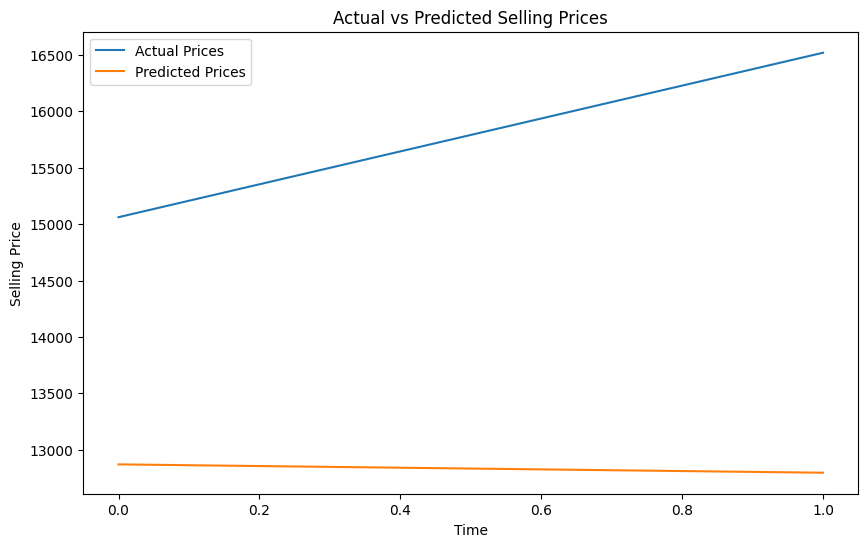

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual Prices')
plt.plot(Y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Time')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

# Supermarket sales dataset

In [ ]:
df_market = pd.read_csv('/content/drive/MyDrive/VNP/supermarket_sales - Sheet1.csv')

In [ ]:
df_market

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df_market.isna().sum()/df_market.count()*100

,0
Invoice ID,0.0
Branch,0.0
City,0.0
Customer type,0.0
Gender,0.0
Product line,0.0
Unit price,0.0
Quantity,0.0
Tax 5%,0.0
Total,0.0


In [ ]:
df_market = df_market.drop(columns=['Invoice ID'])

In [ ]:
df_market

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


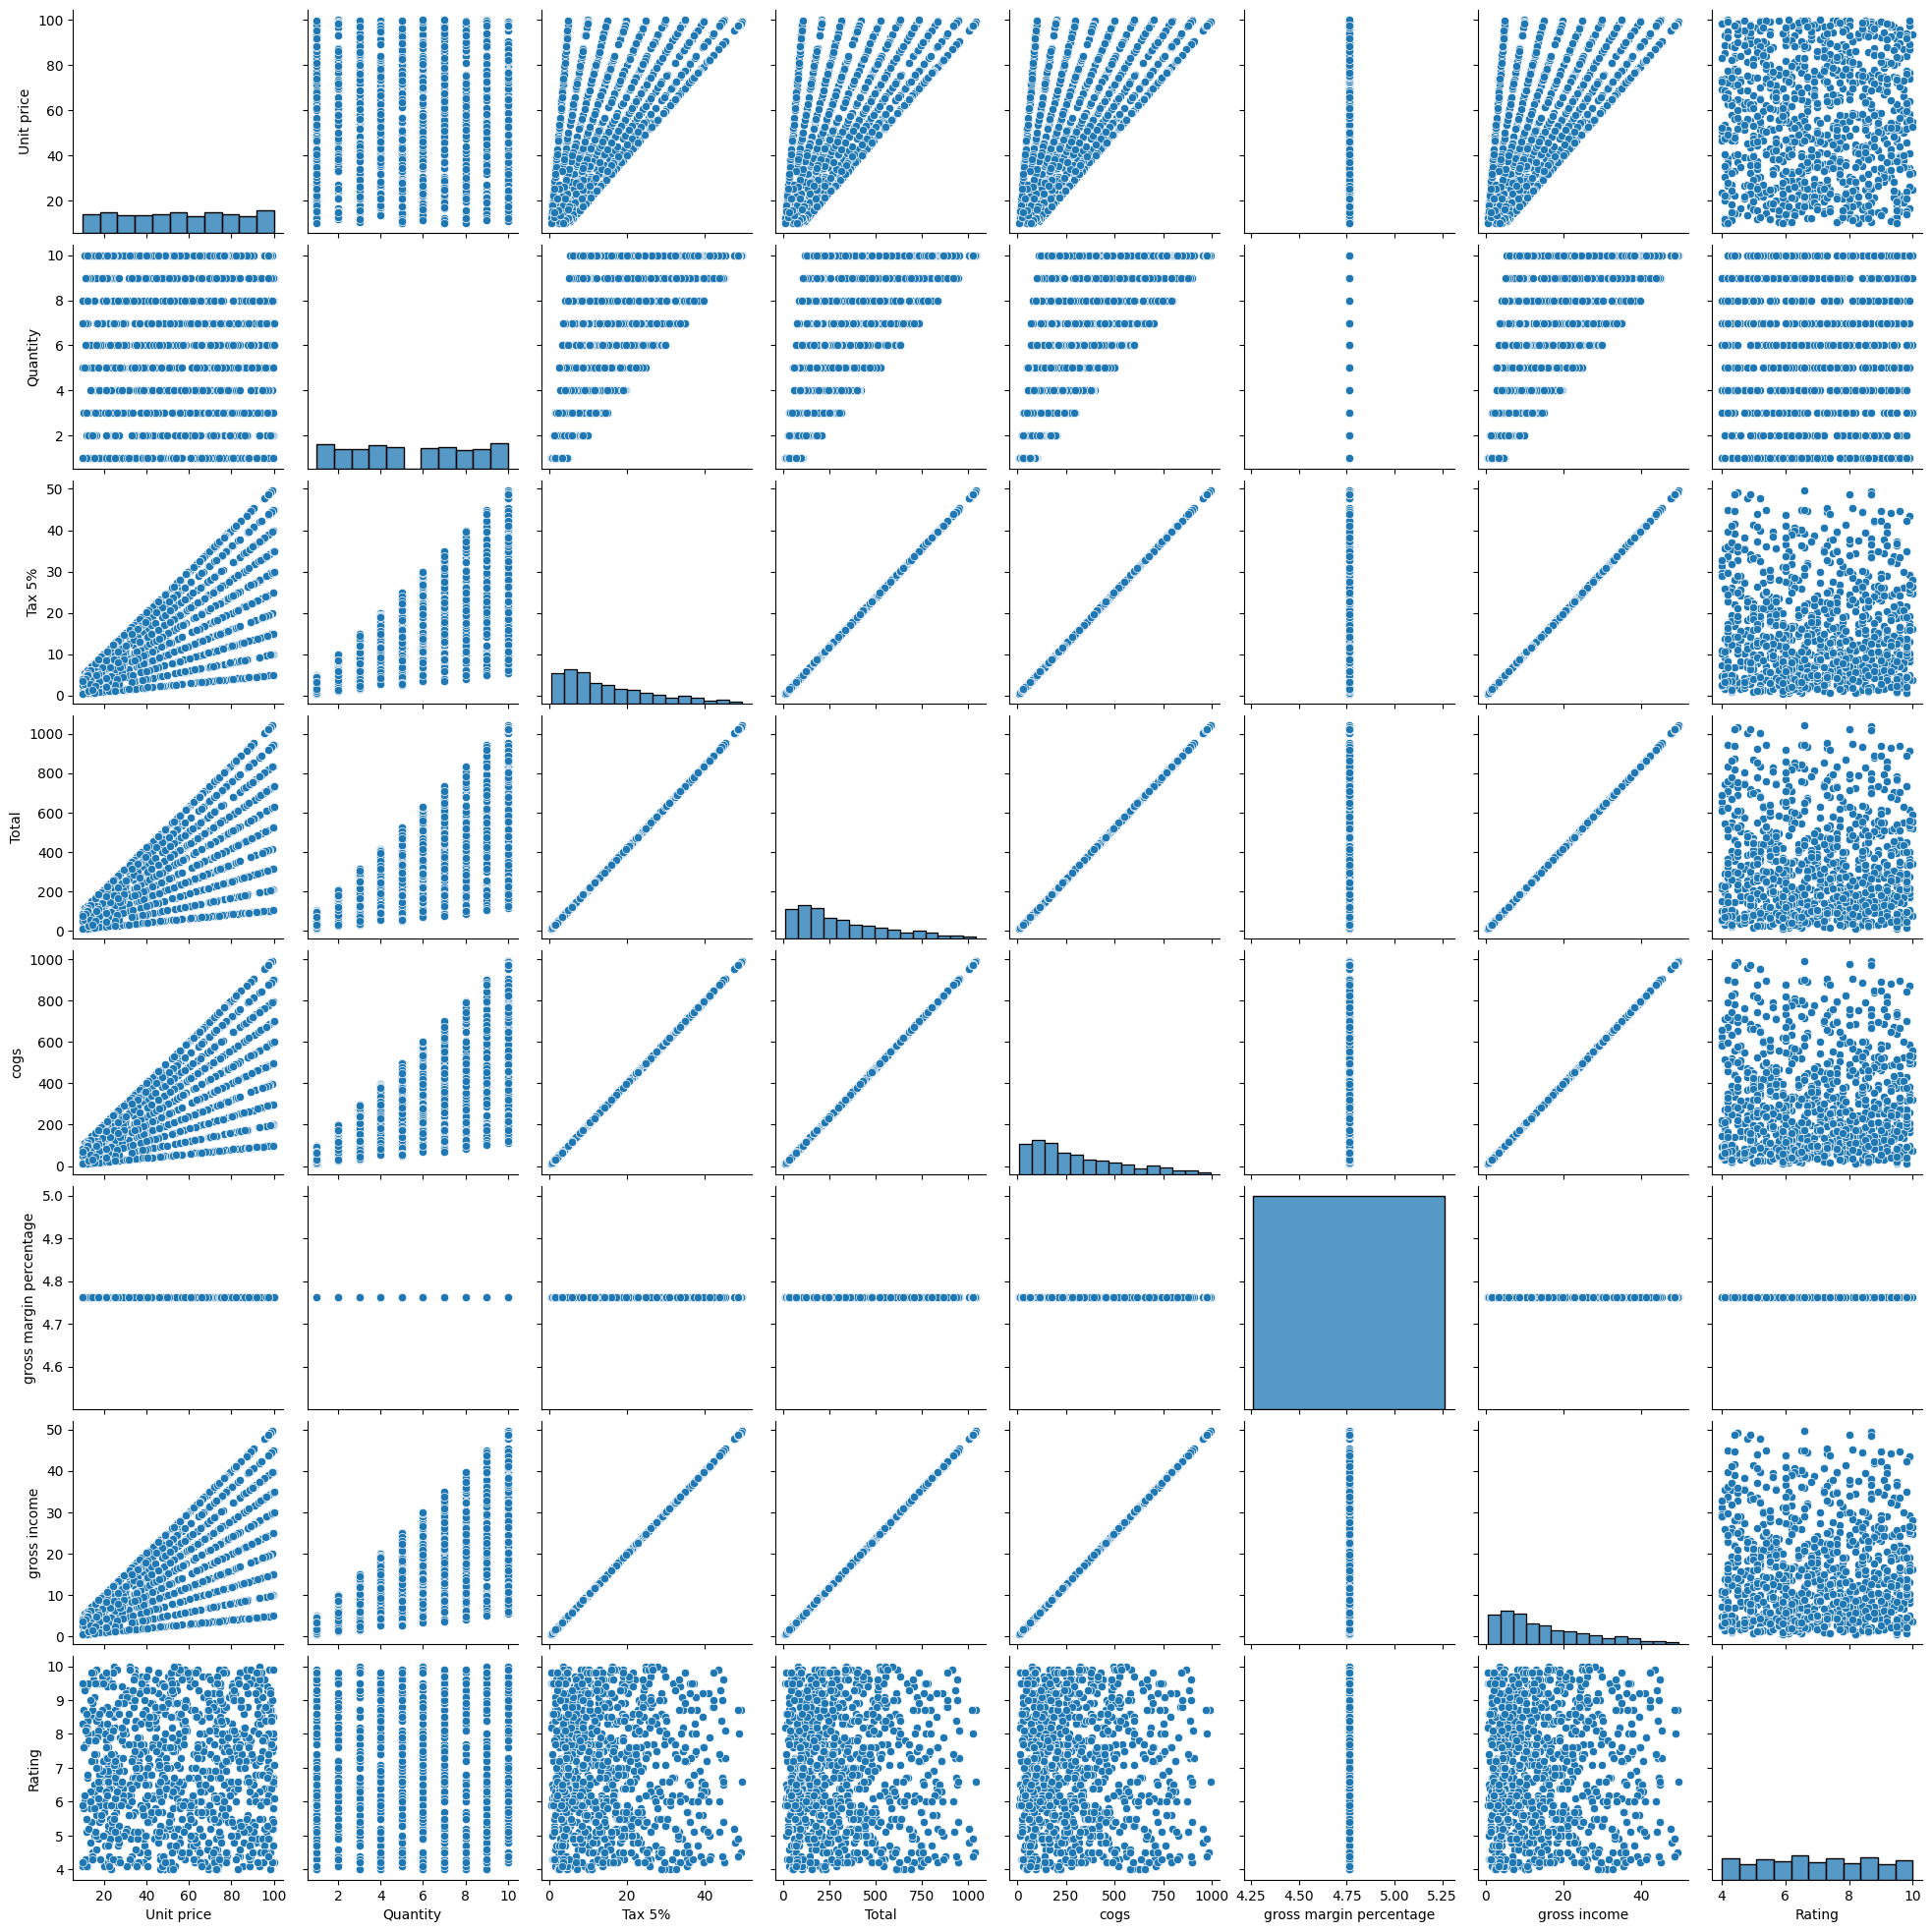

In [ ]:
sns.pairplot(df_market)

## Претпроцесирање на податоците

In [ ]:
df_market['Date'] = pd.to_datetime(df_market['Date'])

In [ ]:
df_market = df_market.drop(columns=['Time','Tax 5%','Total','Payment'])

In [ ]:
df_market.dtypes.to_frame().T

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,cogs,gross margin percentage,gross income,Rating
0,object,object,object,object,object,float64,int64,datetime64[ns],float64,float64,float64,float64


In [ ]:
df_cat = df_market.select_dtypes(['object'])
df_num = df_market.select_dtypes(['float','int'])

In [ ]:
df_cat.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line'], dtype='object')

In [ ]:
df_num.columns

Index(['Unit price', 'Quantity', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [ ]:
df_cat['cogs']=df_market['cogs']

## Визуелизација на податоците

<Axes: xlabel='Branch'>

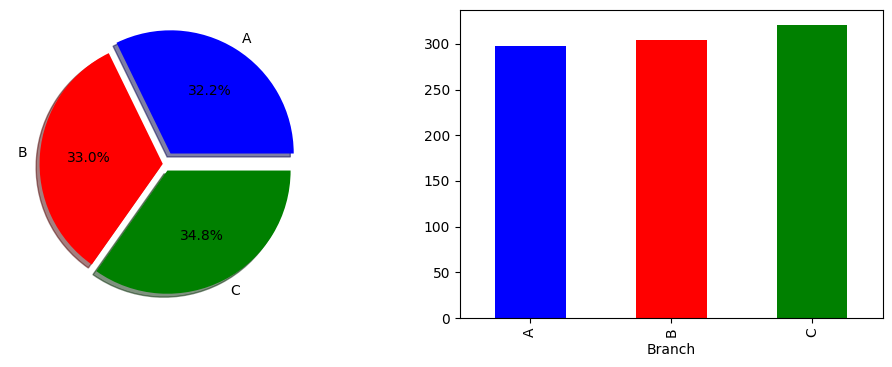

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Branch').cogs.mean().plot.pie(autopct='%1.1f%%',explode=[0.1,0.01,0.06],shadow=True, colors=["blue", "red", "green"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Branch').cogs.mean().plot.bar(color=["blue", "red", "green"])

<Axes: xlabel='City'>

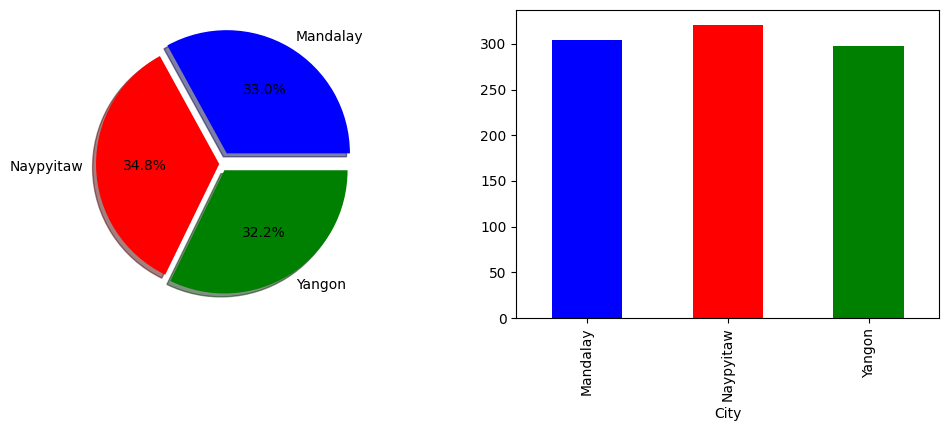

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('City').cogs.mean().plot.pie(autopct='%1.1f%%',explode=[0.1,0.01,0.06],shadow=True, colors=["blue", "red", "green"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('City').cogs.mean().plot.bar(color=["blue", "red", "green"])

<Axes: xlabel='Customer type'>

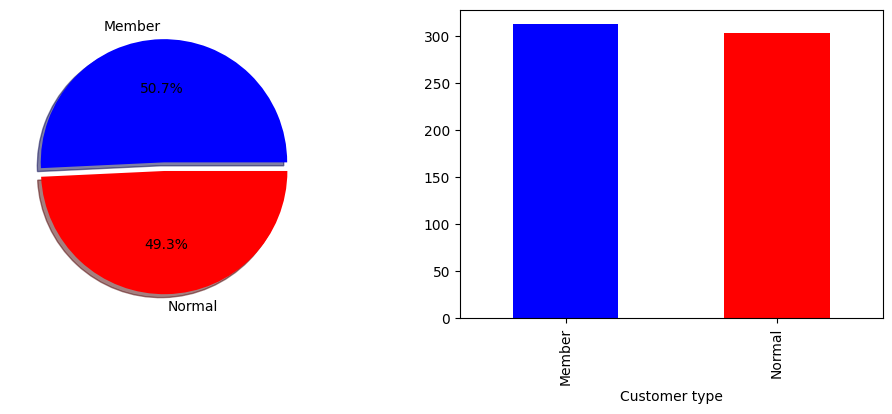

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Customer type').cogs.mean().plot.pie(autopct='%1.1f%%',explode=[0.01,0.06],shadow=True, colors=["blue", "red"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Customer type').cogs.mean().plot.bar(color=["blue", "red"])

<Axes: xlabel='Gender'>

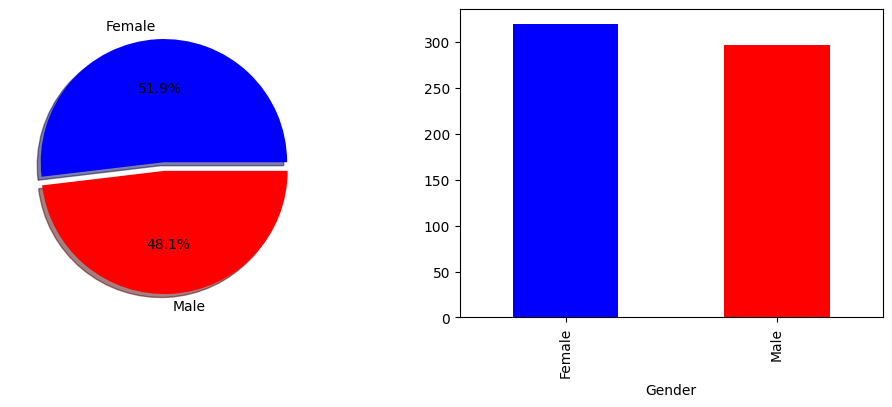

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Gender').cogs.mean().plot.pie(autopct='%1.1f%%',explode=[0.01,0.06],shadow=True, colors=["blue", "red"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Gender').cogs.mean().plot.bar(color=["blue", "red"])

<Axes: xlabel='Product line'>

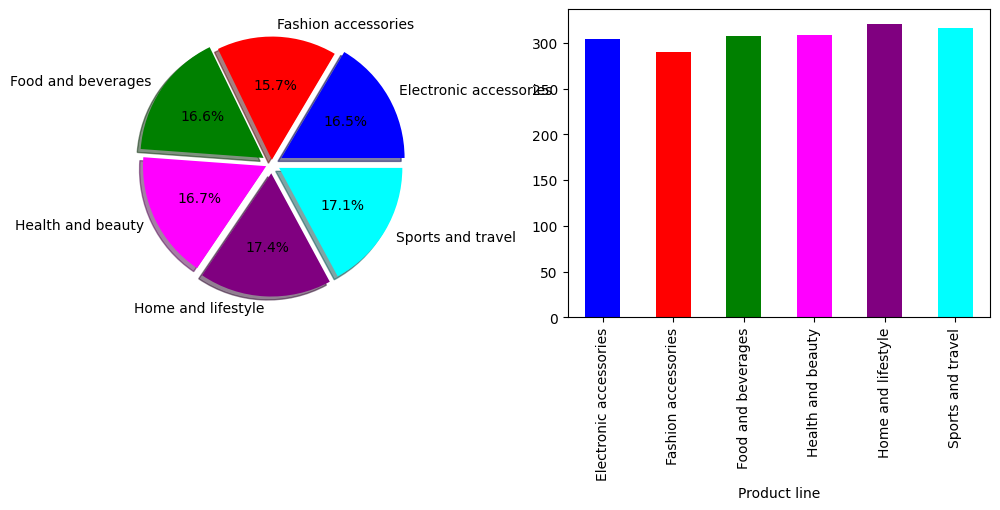

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Product line').cogs.mean().plot.pie(autopct='%1.1f%%',explode=[0.09,0.03,0.08,0.05,0.08,0.07],shadow=True, colors=["blue", "red", "green", "magenta", "purple", "cyan"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Product line').cogs.mean().plot.bar(color=["blue", "red", "green", "magenta", "purple", "cyan"])

In [ ]:
df_cat.sample(2)

,Branch,City,Customer type,Gender,Product line,cogs
51,A,Yangon,Member,Female,Food and beverages,222.95
757,A,Yangon,Normal,Female,Home and lifestyle,579.12


In [ ]:
df_num.sample(2)

,Unit price,Quantity,cogs,gross margin percentage,gross income,Rating
127,31.73,9,285.57,4.761905,14.2785,5.9
479,38.60,1,38.60,4.761905,1.9300,6.7


In [ ]:
df_cat1 = pd.get_dummies(df_cat)

In [ ]:
df_cat1 = df_cat1.astype(int)

In [ ]:
df_cat1.sample(5)

,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
293,72,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0
458,465,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
976,298,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0
214,207,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1
12,234,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0


In [ ]:
df_market = pd.concat([df_num,df_cat1], axis=1)

In [ ]:
df_market

,Unit price,Quantity,cogs,gross margin percentage,gross income,Rating,cogs,Branch_A,Branch_B,Branch_C,...,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,74.69,7,522.83,4.761905,26.1415,9.1,522,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,15.28,5,76.40,4.761905,3.8200,9.6,76,0,0,1,...,0,1,1,0,1,0,0,0,0,0
2,46.33,7,324.31,4.761905,16.2155,7.4,324,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,58.22,8,465.76,4.761905,23.2880,8.4,465,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,86.31,7,604.17,4.761905,30.2085,5.3,604,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,40.35,4.761905,2.0175,6.2,40,0,0,1,...,0,1,0,1,0,0,0,1,0,0
996,97.38,10,973.80,4.761905,48.6900,4.4,973,0,1,0,...,0,1,1,0,0,0,0,0,1,0
997,31.84,1,31.84,4.761905,1.5920,7.7,31,1,0,0,...,1,0,0,1,0,0,1,0,0,0
998,65.82,1,65.82,4.761905,3.2910,4.1,65,1,0,0,...,0,1,0,1,0,0,0,0,1,0


## Поделба на тренирачко и тестирачко множество 80:20

In [ ]:
X, Y = df_market.drop(columns=['cogs']), df_market['cogs']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)

## Креирање Linear Regression, DecisionTreeRegressor и KNeighboursRegressor модели

In [ ]:
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred1=model1.predict(X_test)

In [ ]:
model2=DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred2=model2.predict(X_test)

In [ ]:
model3=KNeighborsRegressor()
model3.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred3=model3.predict(X_test)

## Евалуација на моделите

In [ ]:
print("MAE : ", mean_absolute_error(Y_test, Y_pred1))
print("MSE : ", mean_squared_error(Y_test, Y_pred1))
print("RMSE : ", np.sqrt(mean_absolute_error(Y_test, Y_pred1)))
print("R2 score  : ", r2_score(Y_test, Y_pred1))

MAE :  0.12107223502971659
MSE :  0.04007502897911271
RMSE :  0.3479543576817462
R2 score  :  0.9999993051285265


In [ ]:
print("MAE : ", mean_absolute_error(Y_test, Y_pred2))
print("MSE : ", mean_squared_error(Y_test, Y_pred2))
print("RMSE : ", np.sqrt(mean_absolute_error(Y_test, Y_pred2)))
print("R2 score  : ", r2_score(Y_test, Y_pred2))

MAE :  1.474600000000001
MSE :  7.591482999999991
RMSE :  1.2143310915891106
R2 score  :  0.9998683635621013


In [ ]:
print("MAE : ", mean_absolute_error(Y_test, Y_pred3))
print("MSE : ", mean_squared_error(Y_test, Y_pred3))
print("RMSE : ", np.sqrt(mean_absolute_error(Y_test, Y_pred3)))
print("R2 score  : ", r2_score(Y_test, Y_pred3))

MAE :  9.287795000000003
MSE :  173.95158724999996
RMSE :  3.047588390842832
R2 score  :  0.9969836764194129


# Adidas sales

In [ ]:
df_adidas = pd.read_csv('/content/drive/MyDrive/VNP/Adidas US Sales Datasets.csv')

In [ ]:
df_adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,"$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,"$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,"$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


## Претпроцесирање на податоците

In [ ]:
df_adidas = df_adidas.rename(columns={'Total Sales': 'Total'})

In [ ]:
df_adidas.dtypes.to_frame().T

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total,Operating Profit,Operating Margin,Sales Method
0,object,int64,object,object,object,object,object,object,int64,object,object,object,object


In [ ]:
df_adidas['Price per Unit'] = df_adidas['Price per Unit'].replace('[\$,]', '', regex=True).astype(float)
df_adidas['Total'] = df_adidas['Total'].replace('[\$,]', '', regex=True).astype(float)
df_adidas['Operating Profit'] = df_adidas['Operating Profit'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df_adidas.dtypes.to_frame().T

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total,Operating Profit,Operating Margin,Sales Method
0,object,int64,object,object,object,object,object,float64,int64,float64,float64,object,object


In [ ]:
df_adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.0,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1378.0,32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.0,37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1235.0,42%,Outlet


## Визуелизација на податоците

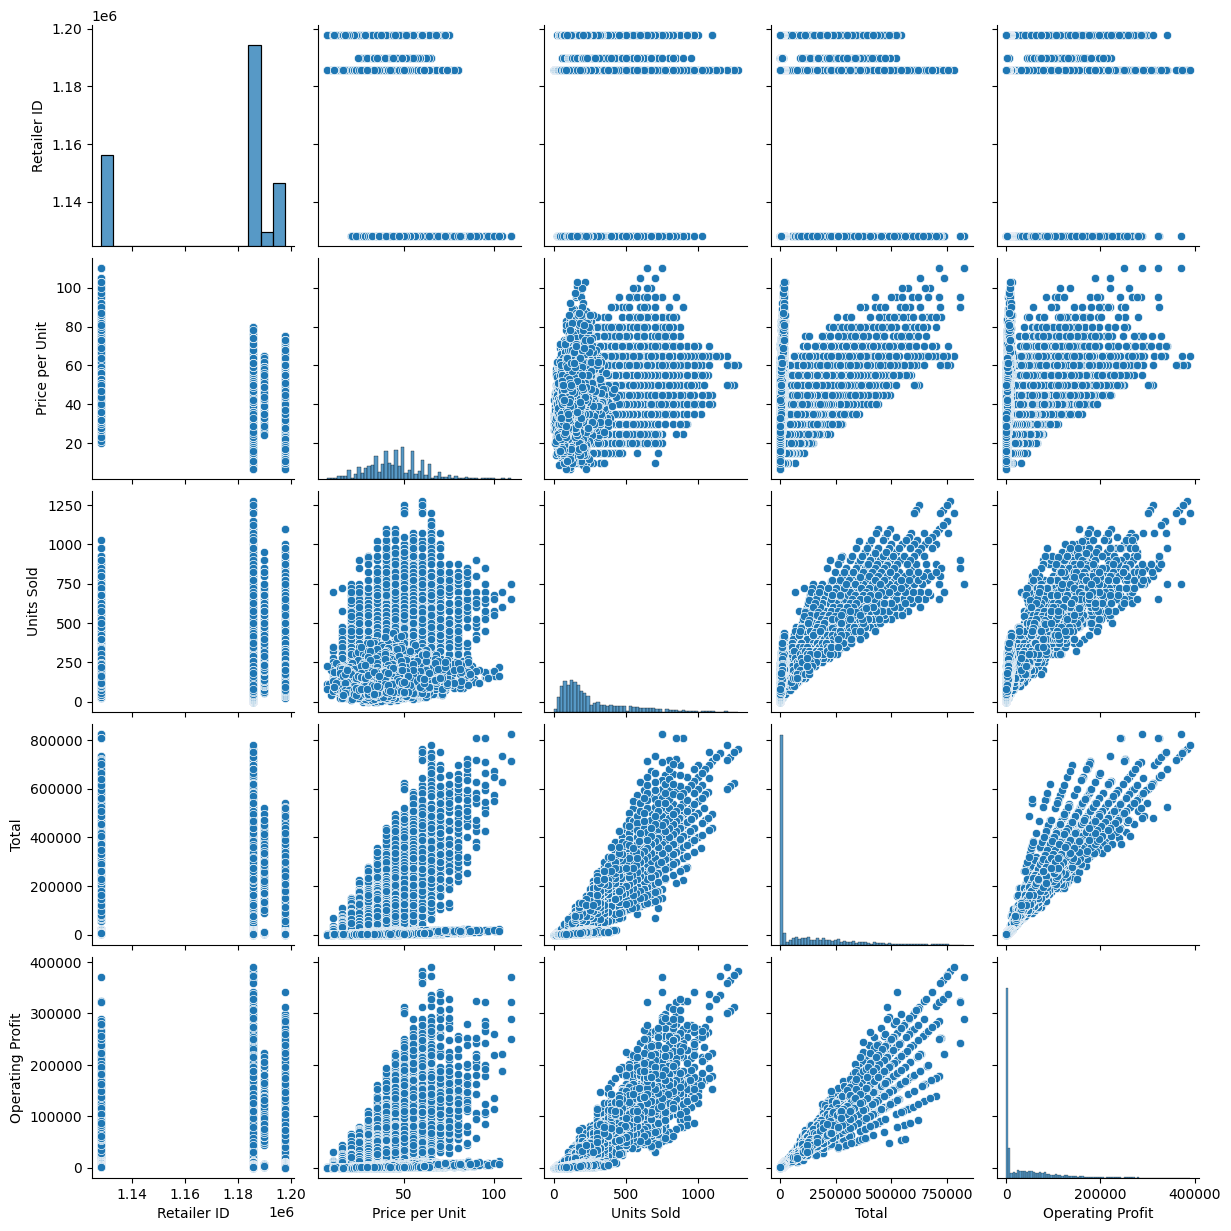

In [ ]:
sns.pairplot(df_adidas)

In [ ]:
df_adidas = df_adidas.drop(columns=['Retailer ID'])

In [ ]:
df_cat = df_adidas.select_dtypes(['object'])
df_num = df_adidas.select_dtypes(['float','int'])

In [ ]:
df_cat.columns

Index(['Retailer', 'Invoice Date', 'Region', 'State', 'City', 'Product',
       'Operating Margin', 'Sales Method'],
      dtype='object')

In [ ]:
df_num.columns

Index(['Price per Unit', 'Units Sold', 'Total', 'Operating Profit'], dtype='object')

In [ ]:
df_cat['Total'] = df_adidas['Total']

In [ ]:
df_cat['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

<Axes: xlabel='Retailer'>

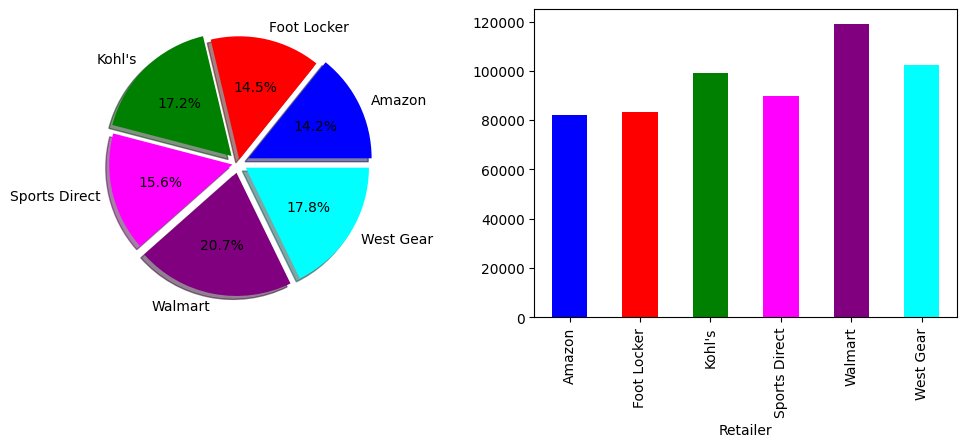

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Retailer').Total.mean().plot.pie(autopct='%1.1f%%',explode=[0.09,0.03,0.08,0.05,0.08,0.07],shadow=True, colors=["blue", "red", "green", "magenta", "purple", "cyan"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Retailer').Total.mean().plot.bar(color=["blue", "red", "green", "magenta", "purple", "cyan"])

In [ ]:
df_cat['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

<Axes: xlabel='Region'>

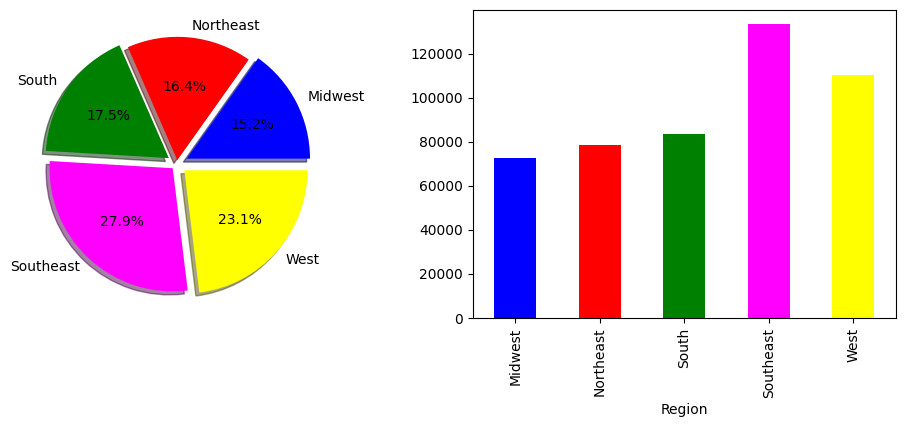

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Region').Total.mean().plot.pie(autopct='%1.1f%%',explode=[0.09,0.03,0.08,0.05,0.08],shadow=True, colors=["blue", "red", "green", "magenta", "yellow"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Region').Total.mean().plot.bar(color=["blue", "red", "green", "magenta", "yellow"])

In [ ]:
df_cat['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [ ]:
df_cat['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [ ]:
df_cat['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

<Axes: xlabel='Product'>

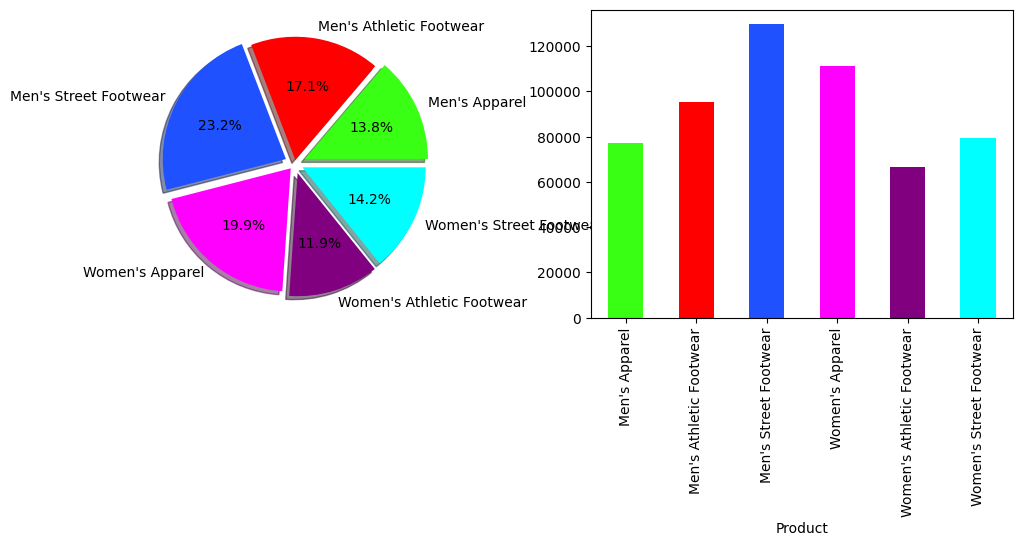

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Product').Total.mean().plot.pie(autopct='%1.1f%%',explode=[0.09,0.03,0.08,0.05,0.08,0.07],shadow=True, colors=["#39FF14", "red", "#1F51FF", "magenta", "purple", "cyan"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Product').Total.mean().plot.bar(color=["#39FF14", "red", "#1F51FF", "magenta", "purple", "cyan"])

In [ ]:
df_cat['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

<Axes: xlabel='Sales Method'>

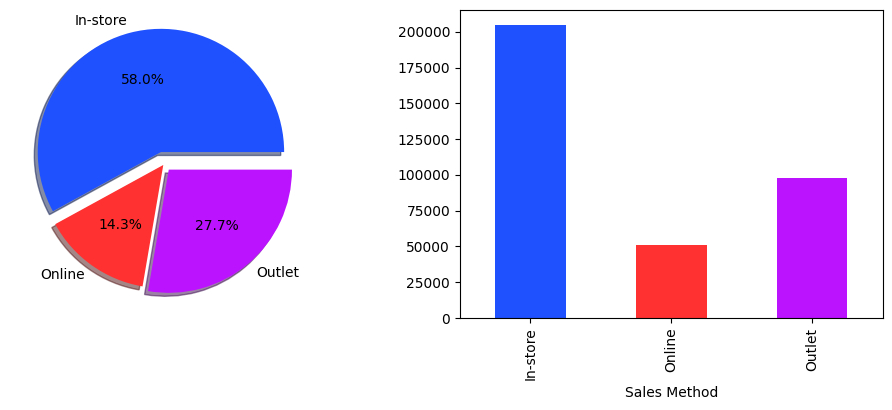

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_cat.groupby('Sales Method').Total.mean().plot.pie(autopct='%1.1f%%',explode=[0.1,0.01,0.06],shadow=True, colors=["#1F51FF", "#FF3131", "#BC13FE"])
plt.ylabel('')
plt.subplot(1,2,2)
df_cat.groupby('Sales Method').Total.mean().plot.bar(color=["#1F51FF", "#FF3131", "#BC13FE"])

In [ ]:
df_cat = df_cat.drop(columns=['Operating Margin'])

In [ ]:
df_cat = df_cat.drop(columns=['Total'])

In [ ]:
df_cat1 = pd.get_dummies(df_cat)

In [ ]:
df_cat1 = df_cat1.astype(int)

In [ ]:
df_cat1.sample(5)

,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Invoice Date_1/1/2020,Invoice Date_1/1/2021,Invoice Date_1/10/2020,Invoice Date_1/10/2021,...,City_Wilmington,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
6734,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4899,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2418,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9433,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5995,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_num.sample(5)

,Price per Unit,Units Sold,Total,Operating Profit
783,55.0,875,481250.0,168438.0
4482,62.0,44,2728.0,1664.0
7438,48.0,94,4512.0,2256.0
8089,34.0,264,8976.0,4668.0
767,45.0,725,326250.0,97875.0


In [ ]:
df_adidas = pd.concat([df_num,df_cat1], axis=1)

In [ ]:
df_adidas

,Price per Unit,Units Sold,Total,Operating Profit,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,...,City_Wilmington,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,50.0,1200,600000.0,300000.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50.0,1000,500000.0,150000.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,40.0,1000,400000.0,140000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,45.0,850,382500.0,133875.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,60.0,900,540000.0,162000.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50.0,64,3200.0,896.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9644,41.0,105,4305.0,1378.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9645,41.0,184,7544.0,2791.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9646,42.0,70,2940.0,1235.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Поделба на тренирачко и тестирачко множество 80:20

In [ ]:
X, Y = df_adidas.drop(columns=['Total']), df_adidas['Total']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)

## Креирање Linear Regression, DecisionTreeRegressor и KNeighboursRegressor модели

In [ ]:
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred1=model1.predict(X_test)

In [ ]:
model2=DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred2=model2.predict(X_test)

In [ ]:
model3=KNeighborsRegressor()
model3.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred3=model3.predict(X_test)

## Евалуација на моделите

In [ ]:
print("MAE : ", mean_absolute_error(Y_test, Y_pred1))
print("MSE : ", mean_squared_error(Y_test, Y_pred1))
print("RMSE : ", np.sqrt(mean_absolute_error(Y_test, Y_pred1)))
print("R2 score  : ", r2_score(Y_test, Y_pred1))

MAE :  210313599.90754634
MSE :  7.649071173253367e+18
RMSE :  14502.192934433962
R2 score  :  -384714409.0953717


In [ ]:
print("MAE : ", mean_absolute_error(Y_test, Y_pred2))
print("MSE : ", mean_squared_error(Y_test, Y_pred2))
print("RMSE : ", np.sqrt(mean_absolute_error(Y_test, Y_pred2)))
print("R2 score  : ", r2_score(Y_test, Y_pred2))

MAE :  3546.8150259067356
MSE :  154685899.71450776
RMSE :  59.555142732653536
R2 score  :  0.9922199841901291


In [ ]:
print("MAE : ", mean_absolute_error(Y_test, Y_pred3))
print("MSE : ", mean_squared_error(Y_test, Y_pred3))
print("RMSE : ", np.sqrt(mean_absolute_error(Y_test, Y_pred3)))
print("R2 score  : ", r2_score(Y_test, Y_pred3))

MAE :  12608.98414507772
MSE :  1163788088.3997304
RMSE :  112.28973303502738
R2 score  :  0.941466612381606
